# 🧮 k-Nearest Neighbor (KNN)

## Clasificación y Regresión

### 💤 *Aprendizaje Perezoso* (*Lazy Learner*)

- **[Basado en Instancias](https://en.wikipedia.org/wiki/Instance-based_learning)**  
- Se llama *perezoso* porque **no intenta aprender una función** a partir de los datos de entrenamiento.  
- En su lugar, **memoriza los patrones** del conjunto de datos.

---

### 📊 *Modelo No Paramétrico*

- No requiere suponer que los datos sigan una distribución específica (*distribution-free tests*).  
- Referencia: [Artículo](http://blog.minitab.com/blog/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test)  
- Wikipedia: [Nonparametric Statistics](https://en.wikipedia.org/wiki/Nonparametric_statistics)  
- 🔸 Otros ejemplos: **Árboles de Decisión, Random Forest**

---

### 🎯 Usos Comunes

- Predicción de **cáncer maligno o benigno**  
- **Reconocimiento de patrones**  
- **Sistemas de recomendación**  
- **Visión por computadora**  
- **Expresión génica**  
- **Interacción proteína-proteína y predicción de estructuras 3D**

---

## ⚠️ Desventajas

- No es eficiente con **grandes volúmenes de datos**.  
- Sufre del **problema de la dimensionalidad**, lo que lo hace **susceptible al sobreajuste (overfitting)**.

---

## 🧩 Pasos del Algoritmo

1. Elegir el número de **vecinos cercanos** `k`.  
2. Seleccionar una **métrica de distancia** (por ejemplo, Euclidiana o Manhattan).  
3. Encontrar los **k vecinos más cercanos** de la muestra objetivo.  
4. Asignar la **etiqueta de clase** mediante **votación mayoritaria** (clasificación) o **promedio** (regresión).


In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets 
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')

In [12]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [13]:
X_train = df[['petal_length', 'petal_width']]
species_num = {'setosa' : 0,
               'versicolor' : 1,
               'virginica' : 2}

df['species'] = df['species'].map(species_num)
y_train = df['species']

In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


c:\Users\PcVIP\Desktop\CursosUdemy\CompleteMachineLearning\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


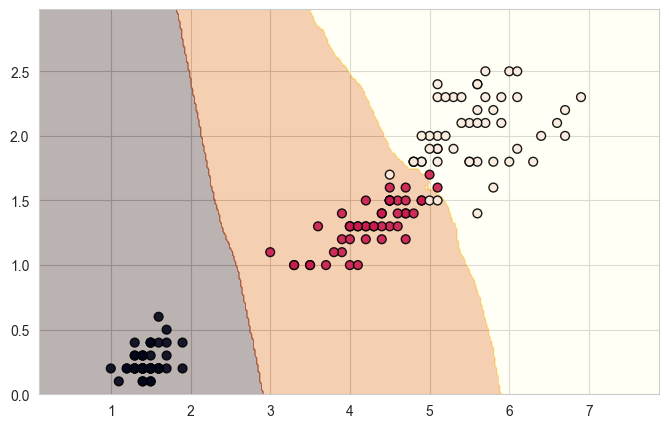

In [17]:
Xv = X_train.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y_train.min(), y_train.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

fig = plt.figure(figsize=(8,5))

ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3, 
                  )
plt.scatter(X_train.values[:, 0], X_train.values[:, 1], c=y_train, s=40, 
            alpha=0.9, edgecolors='k');

---
## 📘 Clase `DistanceMetric` — Documentación

[Referencia de Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

### 🔢 Métricas diseñadas para espacios vectoriales de valores reales

| Identificador | Nombre de clase | Argumentos | Función de distancia |
|:-|:-|:-|:-|
| `"euclidean"` | `EuclideanDistance` | — | $\sqrt{\sum(x - y)^2}$ |
| `"manhattan"` | `ManhattanDistance` | — | $\sum |x - y|$ |
| `"chebyshev"` | `ChebyshevDistance` | — | $\max |x - y|$ |
| `"minkowski"` | `MinkowskiDistance` | p | $\left(\sum |x - y|^p \right)^{1/p}$ |
| `"wminkowski"` | `WMinkowskiDistance` | p, w | $\left(\sum w|x - y|^p \right)^{1/p}$ |
| `"seuclidean"` | `SEuclideanDistance` | V | $\sqrt{\sum \frac{(x - y)^2}{V}}$ |

> 🔍 Consulta la documentación para más información sobre:  
> • Métricas para espacios vectoriales bidimensionales  
> • Métricas para espacios de valores enteros  
> • Métricas para espacios de valores booleanos  
> • Definición de métricas personalizadas  

---

### 📚 Conceptos clave (según [Rorasa’s Blog](https://rorasa.wordpress.com/2012/05/13/l0-norm-l1-norm-l2-norm-l-infinity-norm/))

* **Norma:** tamaño o longitud total de todos los vectores en un espacio vectorial o matriz.  
  → A mayor norma, mayor el valor o magnitud del vector o matriz.  

* Aparece comúnmente como:  
  $\|x\|$ donde *x* puede ser un vector o una matriz.

---

### 📏 Tipos de Distancias

#### 🔹 **Distancia Euclidiana**
* La más común.
* Corresponde a la norma **L2** de dos vectores.  
* En un plano bidimensional, representa la línea recta entre dos puntos.  
* Ejemplo entre (1,2) y (3,3):  
  $\sqrt{(1-3)^2 + (2-3)^2} = 2.236$

---

#### 🔹 **Distancia Manhattan**
* También llamada **L1 norm** o **taxicab distance**.  
* Es la suma del valor absoluto de las diferencias entre los elementos.  
* Representa el camino más largo (como un taxi que se mueve por calles en ángulo recto).  
* Ejemplo entre (1,2) y (3,3):  
  $|1-3| + |2-3| = 3$

---

#### 🔹 **Distancia Chebyshev**
* Toma el **máximo** de las diferencias absolutas entre los elementos.  
* Similar al movimiento del rey en ajedrez.  
* Útil en espacios de muchas dimensiones donde la mayoría son irrelevantes.  
* Ejemplo entre (1,2) y (3,3):  
  $\max(|1-3|, |2-3|) = 2$

---